In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
from pprint import pprint
import sys
from colorama import Style, Fore

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)


red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

In [5]:
train = pd.read_csv('train.csv').drop(['id','EC3','EC4','EC5','EC6'],axis = 1)
test = pd.read_csv('test.csv').drop('id',axis = 1)
sub = pd.read_csv('sample_submission.csv')

In [6]:
df = train.copy()

In [7]:
df.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0


In [8]:
def summarize(data):
    
    size = round(sys.getsizeof(df) / 1024 **2,2)
    
    print(f'data size : {size}MB')
    
    result = pd.DataFrame()
    
    result['Dtype'] = data.dtypes.values
    result['Count'] = data.count().values
    result['Nunique'] = data.nunique().values
    result['Missing value'] = data.isna().sum().values
    result['Most Freq Value'] = data.mode().iloc[0].values
    result['Min'] = data.describe(include = 'all').T['min'].values
    result['Max'] = data.describe(include = 'all').T['max'].values
    result['Mean'] = data.describe(include = 'all').T['mean'].values
    result['Median'] = data.describe(include = 'all').T['50%'].values
    result['skew'] = data.skew().values
    result['kurtosis'] = data.kurtosis().values
    result = result.set_index(data.columns)
    return result


* Mean
    * The mean is the average value of a dataset. It is calculated by summing up all the values in the dataset and dividing the sum by the number of values.

* Median
    * The median is the middle value of a dataset when it is arranged in ascending or descending order. If the dataset has an odd number of values, the median is the middle value. If the dataset has an even number of values, the median is the average of the two middle values.

* Skewness
    * Skewness measures the asymmetry of a dataset's distribution. It indicates whether the dataset is skewed to the left (negative skewness) or skewed to the right (positive skewness). If the skewness is close to zero, the dataset is approximately symmetric.

* Kurtosis
    * Kurtosis measures the peakedness or flatness of a dataset's distribution. It tells us about the tails of the distribution. Positive kurtosis indicates a relatively peaked distribution with heavier tails, while negative kurtosis indicates a relatively flat distribution with lighter tails. Kurtosis of zero represents a normal distribution.

In [9]:
summarize(df)

data size : 3.74MB


,Dtype,Count,Nunique,Missing value,Most Freq Value,Min,Max,Mean,Median,skew,kurtosis
BertzCT,float64,14838,2368,0,146.218849,0.000000,4069.959780,515.153604,290.987941,1.775677,2.939466
Chi1,float64,14838,1259,0,5.574586,0.000000,69.551167,9.135189,6.485270,1.679368,2.906784
Chi1n,float64,14838,3157,0,3.562009,0.000000,50.174588,5.854307,4.052701,1.722855,3.467028
Chi1v,float64,14838,3306,0,5.829902,0.000000,53.431954,6.738497,4.392859,1.782578,3.112454
Chi2n,float64,14838,3634,0,2.719449,0.000000,32.195368,4.432570,2.970427,1.667144,3.033378
Chi2v,float64,14838,3725,0,2.719449,0.000000,34.579313,5.253221,3.242775,1.748260,2.819865
Chi3v,float64,14838,3448,0,0.000000,0.000000,22.880836,3.418749,1.948613,1.644531,2.534616
Chi4n,float64,14838,2930,0,0.000000,0.000000,16.072810,1.773472,1.073261,1.893930,5.154985
EState_VSA1,float64,14838,719,0,0.000000,0.000000,363.705954,29.202823,17.353601,1.426010,2.938943
EState_VSA2,float64,14838,445,0,0.000000,0.000000,99.936429,10.435316,6.420822,1.914321,4.026768


In [10]:
df.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0,1,1
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0,0,1
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0,1,1
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0,1,1
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2,1,0


# **EDA**

Text(0.5, 0.98, 'Histgram of Target value')

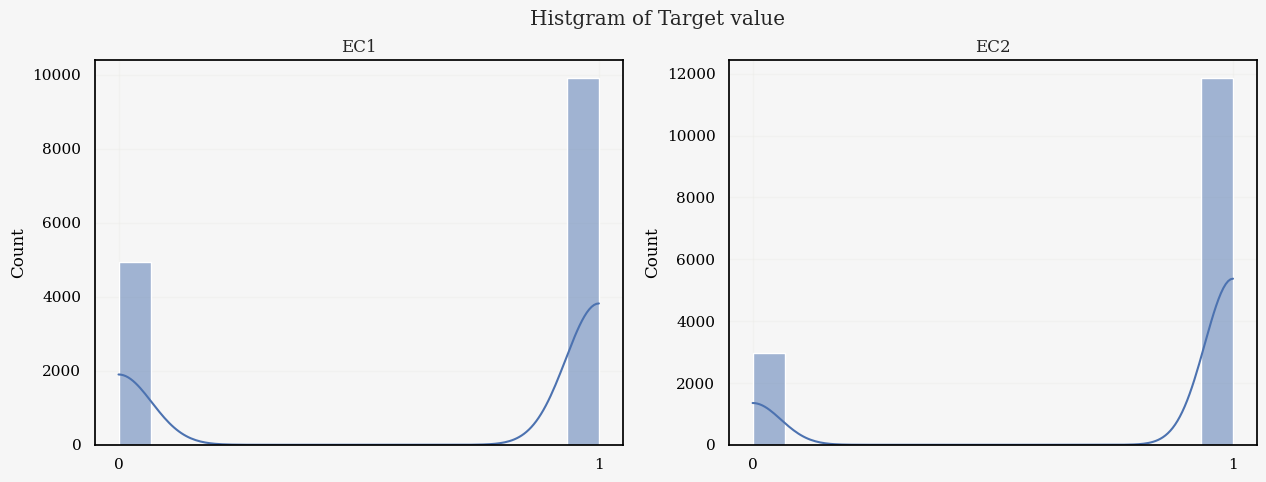

In [11]:
fig,ax  = plt.subplots(ncols =2 , figsize = (15,5))

for i,col in enumerate(['EC1','EC2']):
    
    sns.histplot(data = df,
                    x = col,
                    kde = True,
                    ax = ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('')
    ax[i].set_xticks([0,1])
    
fig.suptitle('Histgram of Target value')

In [12]:
# def t_test(data,target):

    
#     table = pd.DataFrame()
#     cols = data.columns[:-1] # except target columns
#     cond = data[target] == 1
    
#     posi_mean = []
#     nega_mean = []
#     f_statistic = []
#     p_values = []
    
#     for col in cols:
        
#         positive = data[col][cond]
#         negative = data[col][~cond]
        
#         p_mean = np.mean(positive)
#         n_mean = np.mean(negative)
        
#         posi_mean.append(p_mean)
#         nega_mean.append(n_mean)
        
#         f_stat, p_value = stats.ttest_ind(positive,negative)
#         f_statistic.append(round(f_stat,2))
#         p_values.append(round(p_value,2))
        
#     table['Positive'] = posi_mean
#     table['Negative'] = nega_mean
#     table['F Statistic'] = f_statistic
#     table['P - value'] = p_values

#     table = table.set_index([cols])
#     table = table.sort_values(by = 'P - value')
    
#     return table

In [13]:
# def t_test_table(data,feature,names,givemetable = False):
    
    
#     targets = ['EC1','EC2']
#     results = []

#     print(f'\t {blu}{names} \n')

#     for target in targets:
        
        
#         new_features = feature + [target]
        
#         table = t_test(data[new_features], target)
#         results.append(table)
#         if givemetable is False:
#             print(f'{blu}{target} T - TEST RESULT{res}')
#             display(table)
        
#     if givemetable is True:
#         return results

* Although there are so many variables, let's visualize after categorizing the variables related to each other.

In [14]:
others = ['BertzCT','ExactMolWt','SlogP_VSA3']

molecular_connectivity =  ['Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n']
Electrotopological_state = ['EState_VSA1','EState_VSA2','MaxAbsEStateIndex','MinEStateIndex','VSA_EState9']
Morgan_fingerprint_density = ['FpDensityMorgan1','FpDensityMorgan2', 'FpDensityMorgan3']
Atom = ['HeavyAtomMolWt','NumHeteroatoms']
Hallkier = ['HallKierAlpha','Kappa3']
Peoe = ['PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7','PEOE_VSA8']
Smr = ['SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3']
Co = ['fr_COO','fr_COO2']

factors = [molecular_connectivity,Electrotopological_state,Morgan_fingerprint_density,
            Atom,Hallkier,Peoe,Smr,Co,others]

factor_names = ['Molecular Connectivity','Electrotopological State','Morgan Fingerprint Density',
            'Atom','Hallkier','Peoe','Smr','Co','others']

In [15]:
def numeric_eda(data, cols,title):
    
    targets = ['EC1','EC2']
    
    if len(cols) == 1:
        row_size = 5
    else:
        row_size = round(len(cols) / 2) * 5
    

    fig,ax = plt.subplots(ncols = 4, nrows = len(cols),
                            figsize = (20, row_size))
    
    ax = ax.flatten()
    fig.subplots_adjust(hspace = 1)
    
    for num,target in enumerate(targets):
        for i,col in enumerate(cols):

            # histogram plot
            
            idx = 2 * num + i * 4 

            sns.histplot(data = data,
                            x = col,
                            hue = target,
                            kde = True,
                            legend = False,
                            bins = 30,
                            ax  = ax[idx])
            
            
            positive = df[col][df[target] == 1]
            negative = df[col][df[target] == 0]
            
            p_mean = round(np.mean(positive),2)
            n_mean = round(np.mean(negative),2)
            
            ax[idx].axvline(n_mean, c = 'blue', ls = ':',
                            label = f'{target} Negative mean : {n_mean}')
            ax[idx].axvline(p_mean, c = 'salmon', ls = ':',
                            label = f'{target} Positive  mean : {p_mean}')
            
            positive = df[col][df[target] == 1].values
            negative = df[col][df[target] == 0].values 
            
            ax[idx].set_title(f'{col}')
            ax[idx].set_xlabel('')
            ax[idx].set_ylabel('')
            ax[idx].legend(loc = 'best', fontsize  = 10)
            
    for num,target in enumerate(targets):
        for i,col in enumerate(cols):
            # boxplot
            
            idx = 2 * num + 1 + i * 4 

            sns.boxplot(data = data,
                            x = target,
                            y = col,
                            ax  = ax[idx])
            
            ax[idx].set_title(f'{col}[{target}]')
            ax[idx].set_xlabel('')
            ax[idx].set_ylabel('')
            
            
    fig.suptitle(title,fontsize = 20)
            

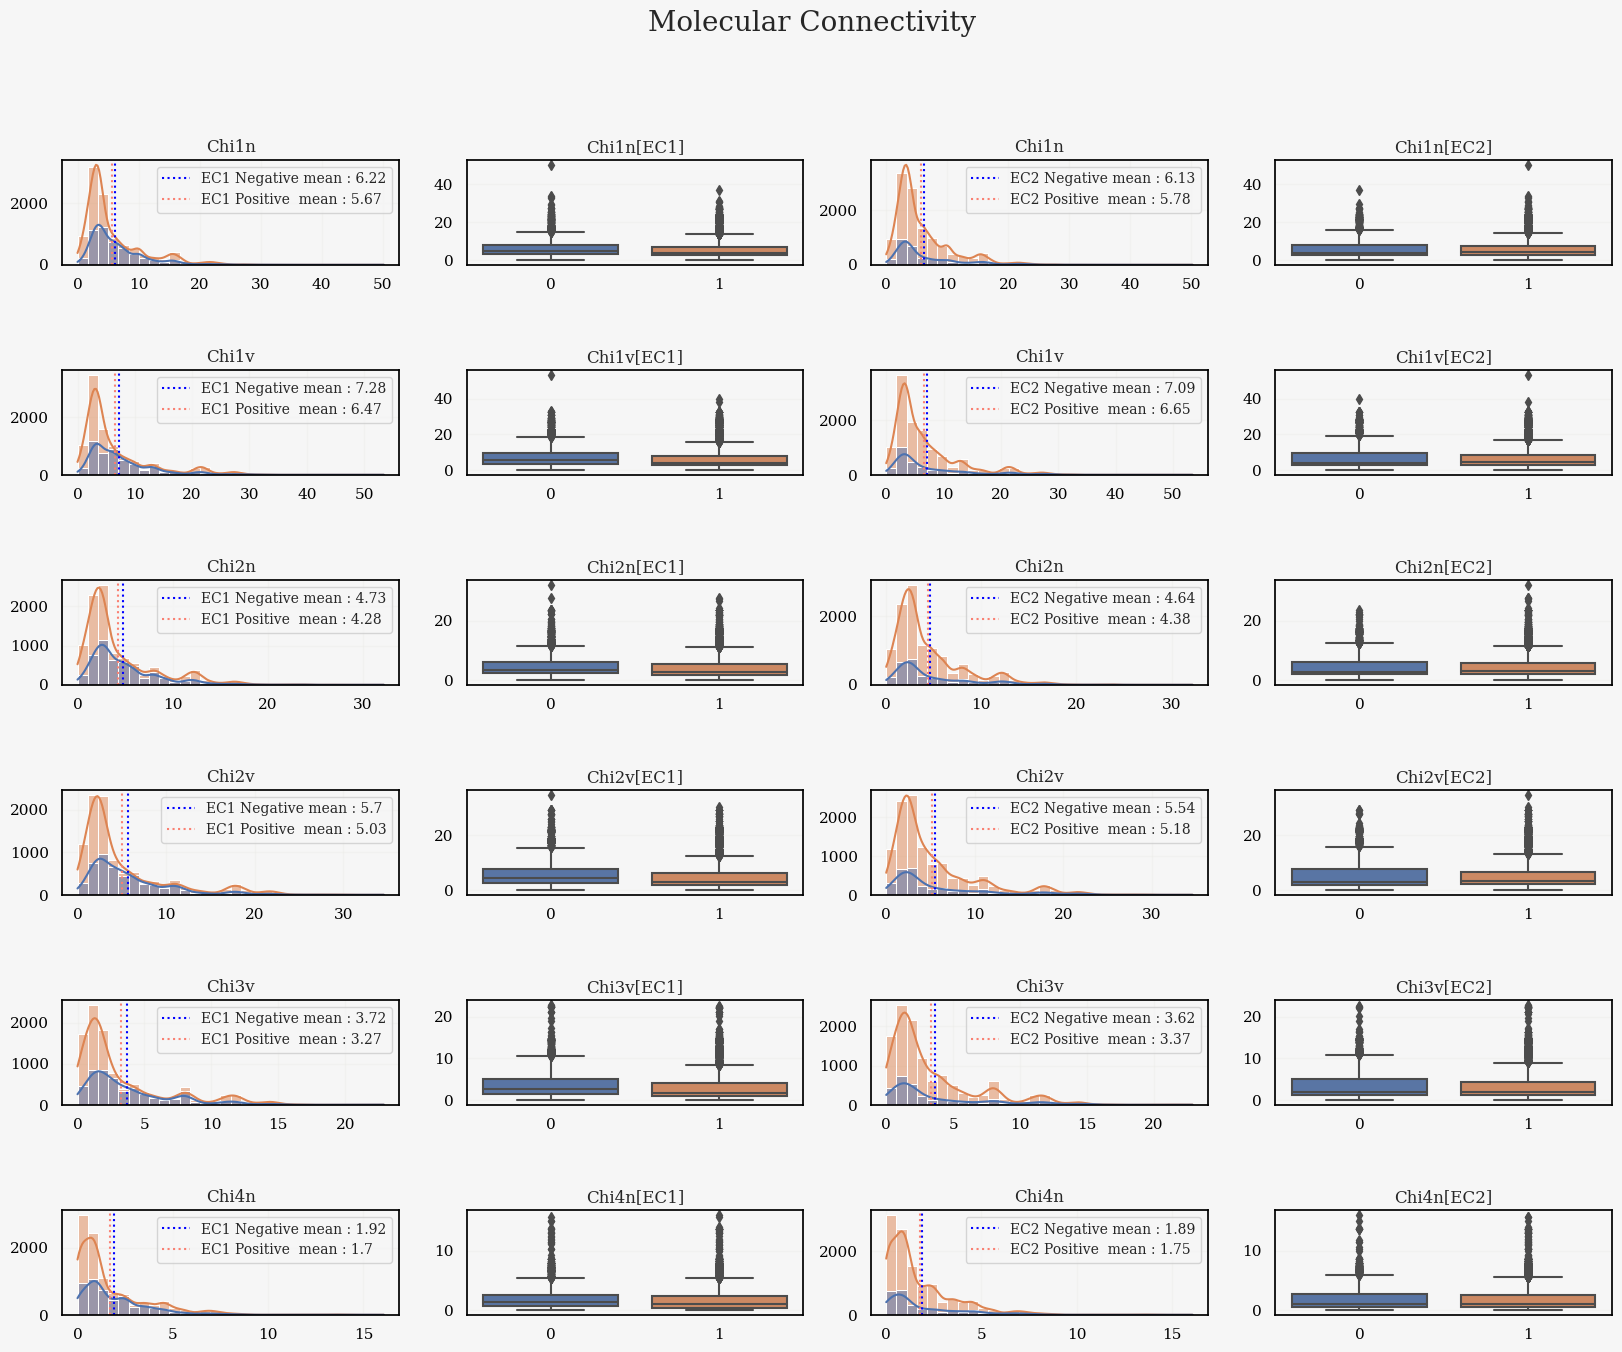

In [16]:
numeric_eda(df,factors[0],factor_names[0])

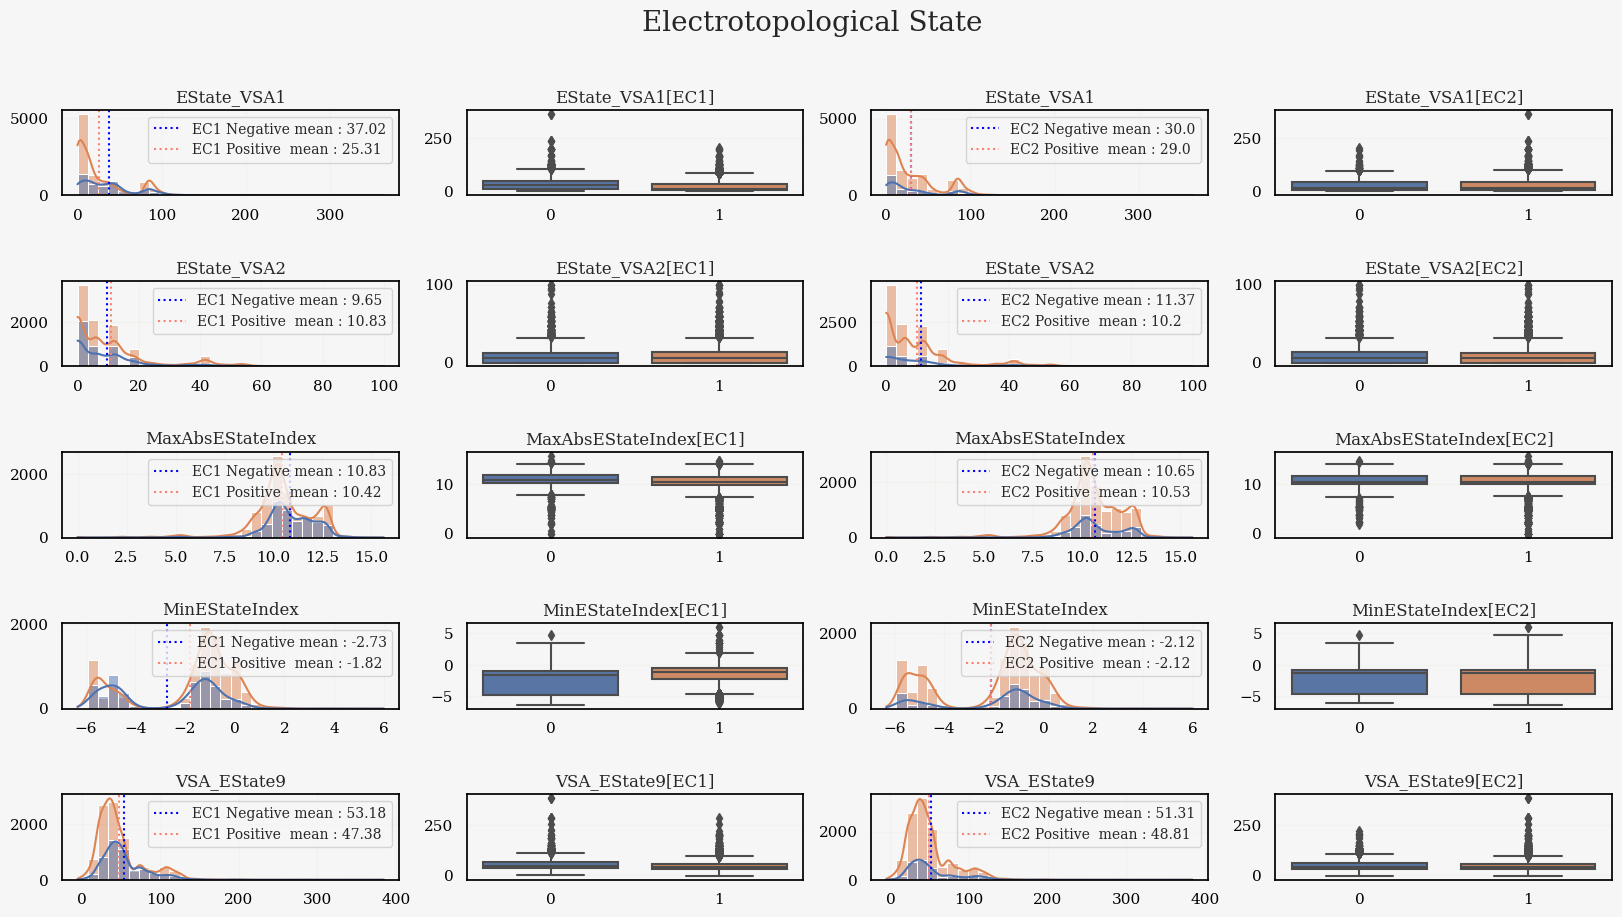

In [17]:
numeric_eda(df,factors[1],factor_names[1])

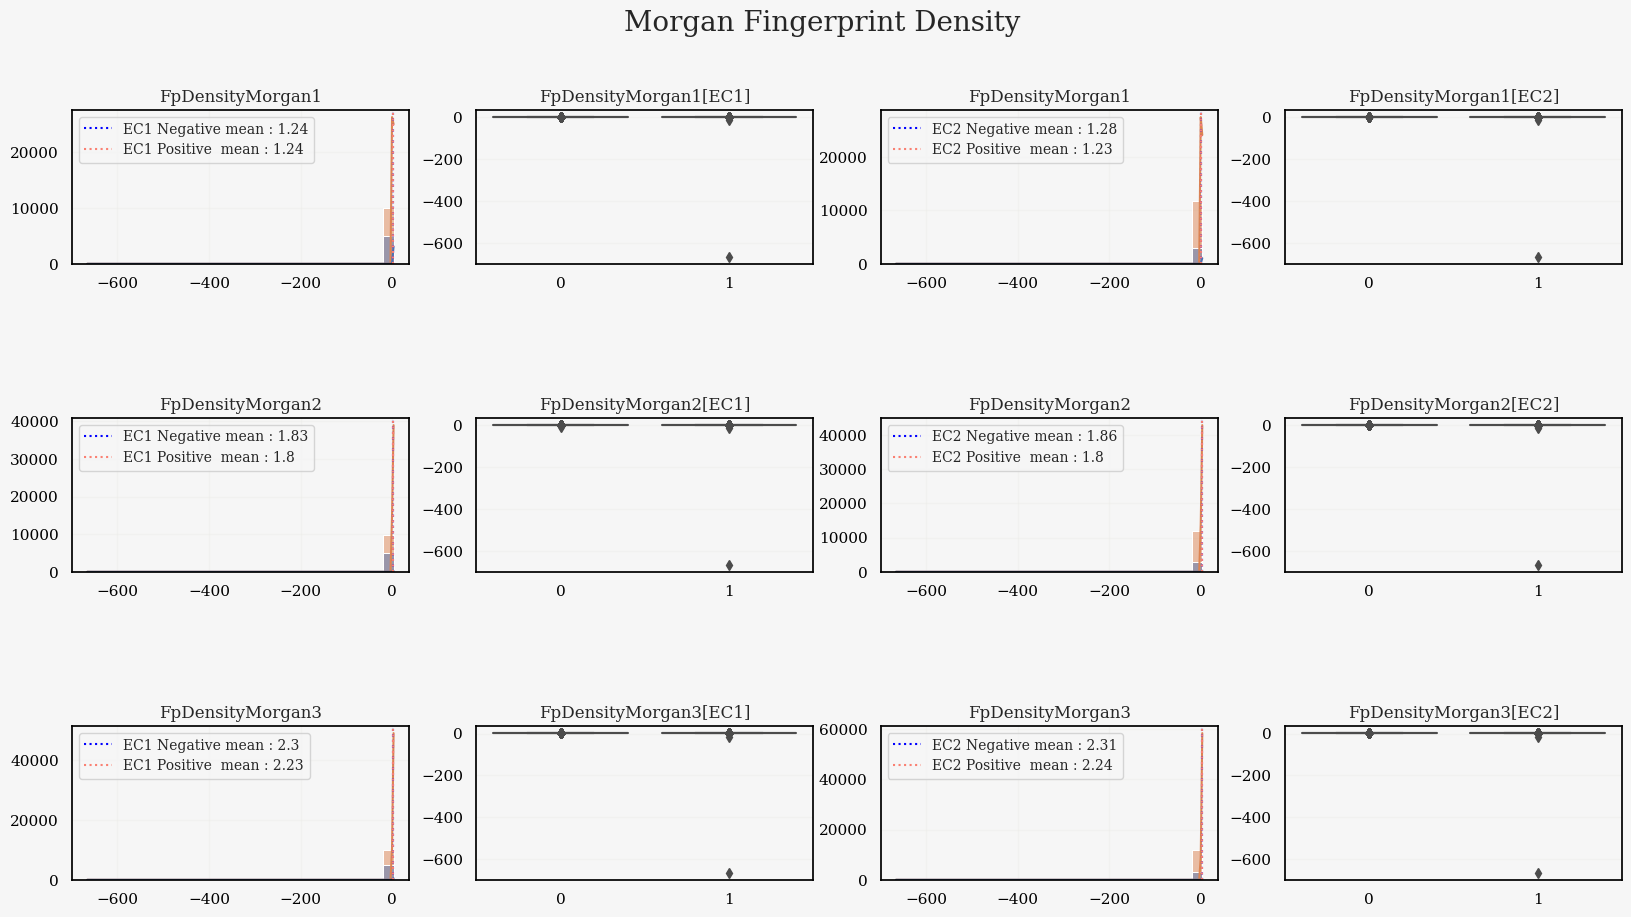

In [18]:
numeric_eda(df,factors[2],factor_names[2])

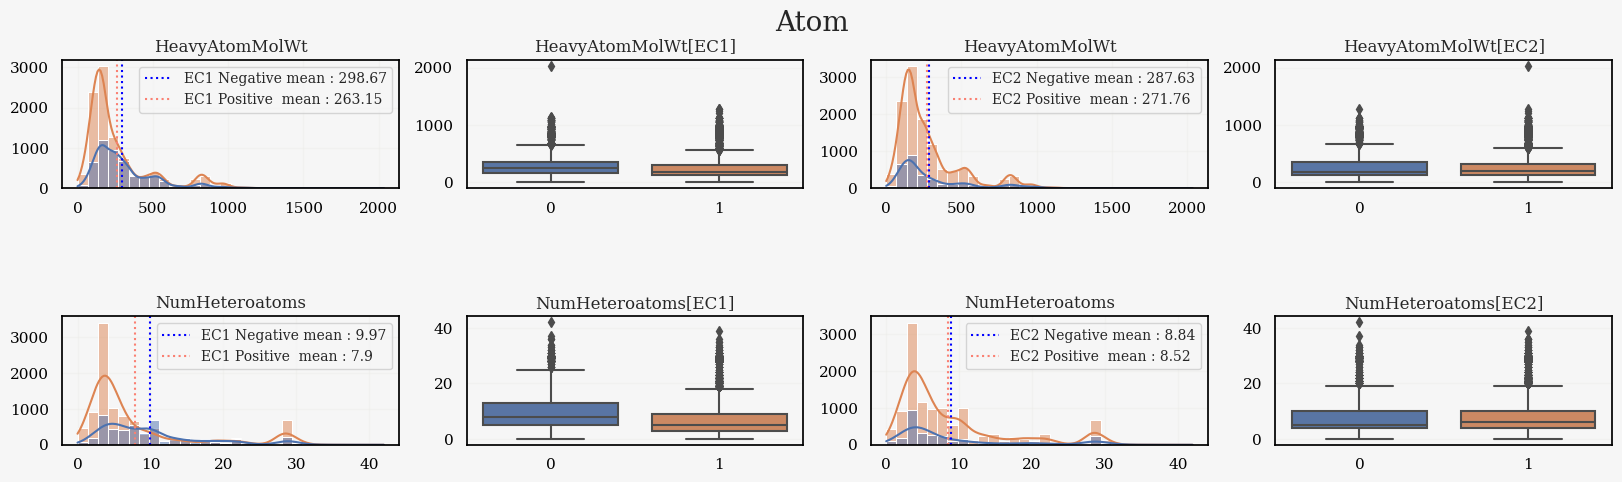

In [19]:
numeric_eda(df,factors[3],factor_names[3])

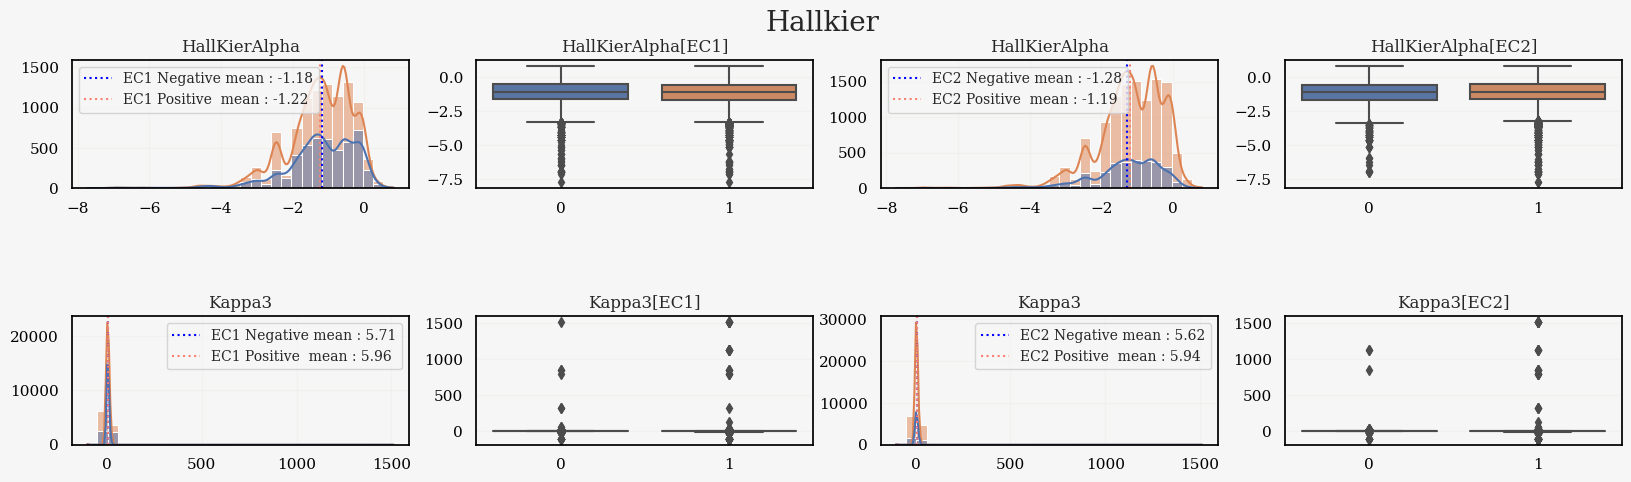

In [20]:
numeric_eda(df,factors[4],factor_names[4])

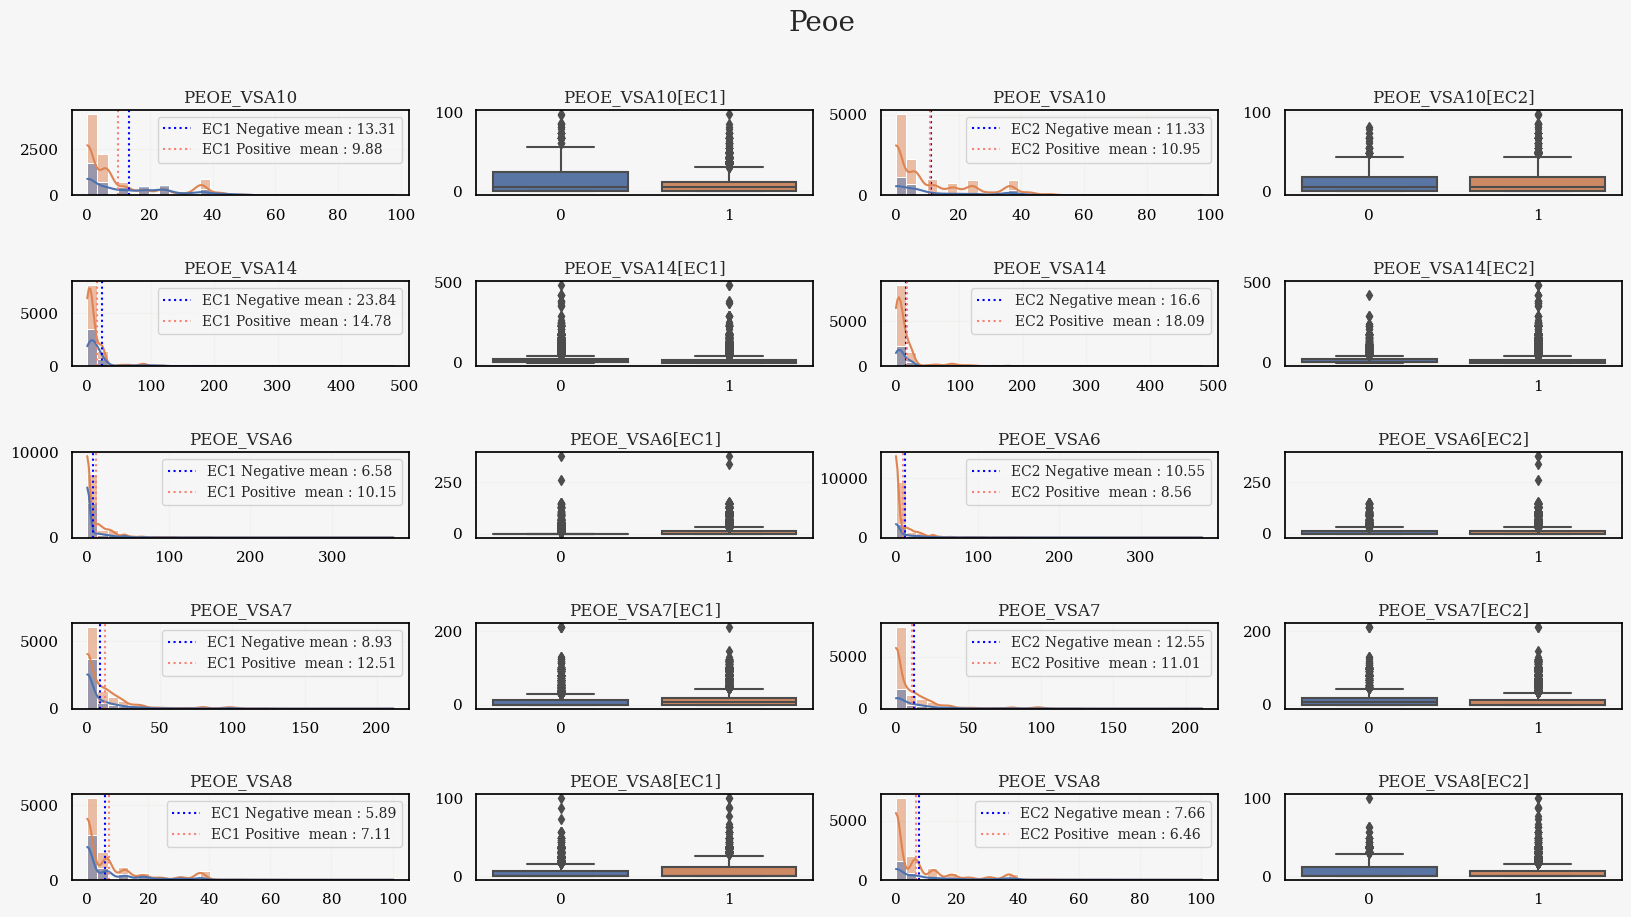

In [21]:
numeric_eda(df,factors[5],factor_names[5])

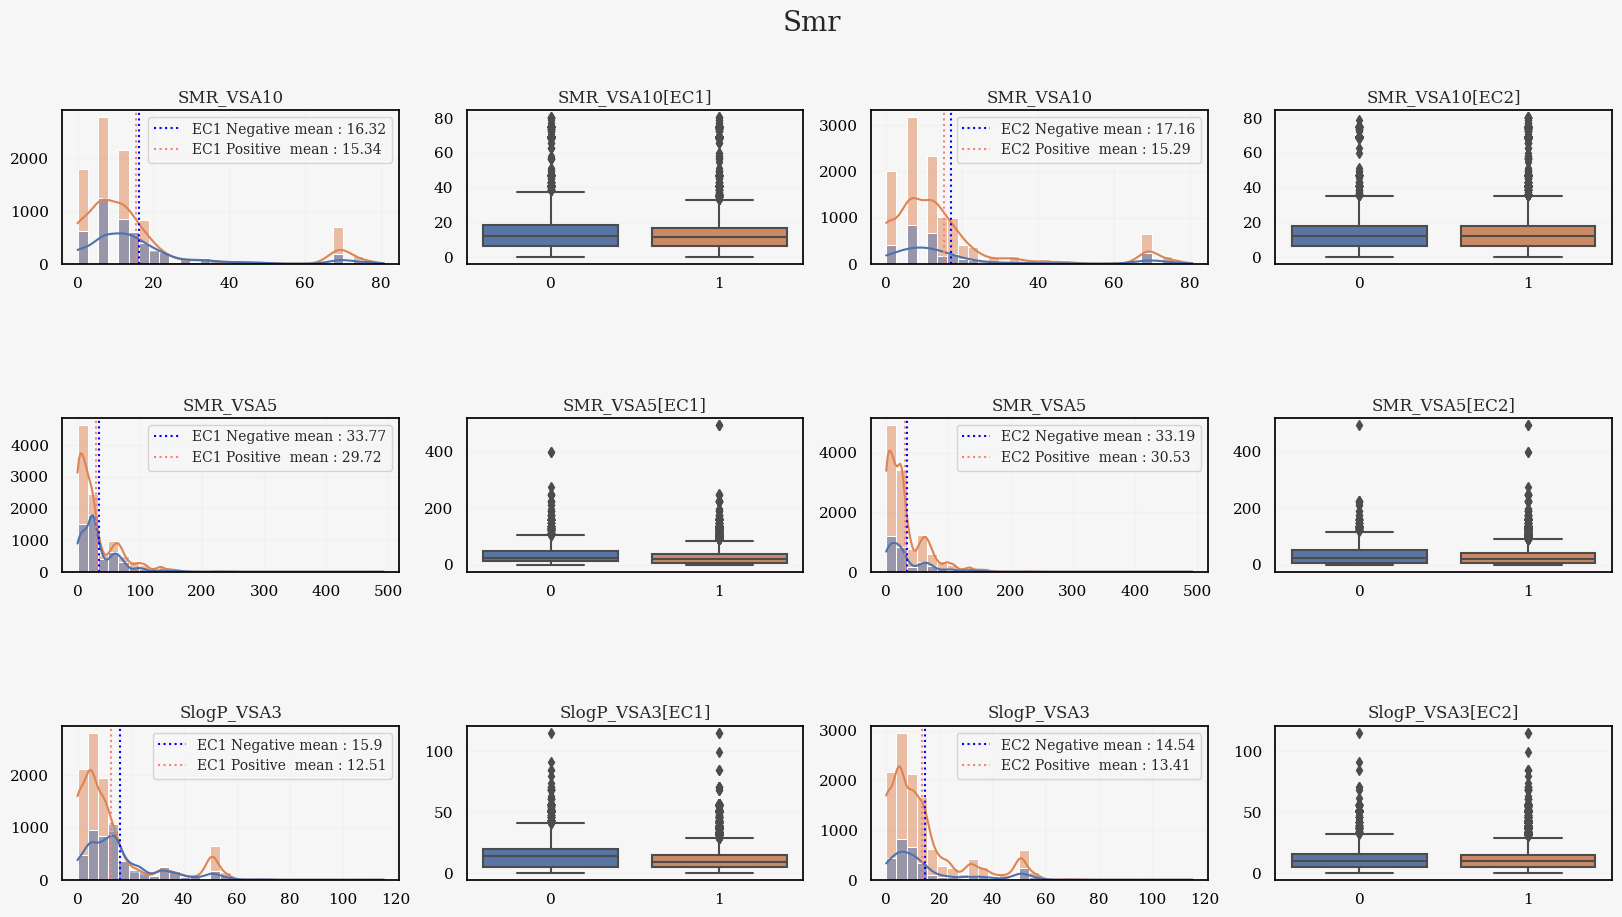

In [22]:
numeric_eda(df,factors[6],factor_names[6])

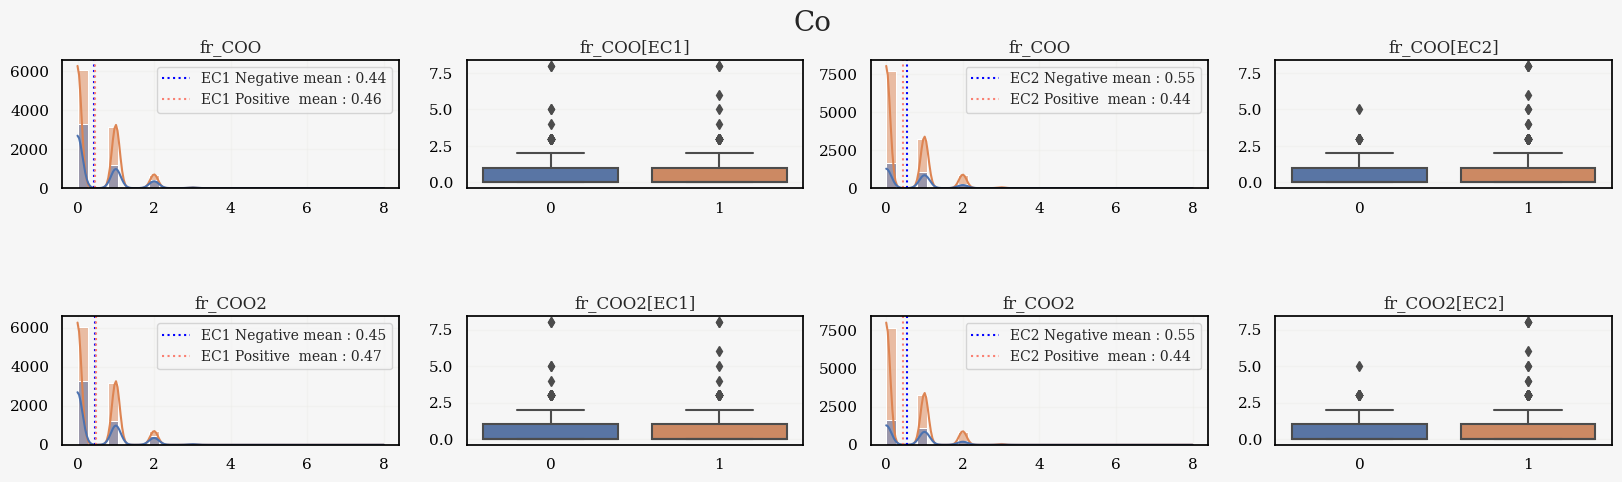

In [23]:
numeric_eda(df,factors[7],factor_names[7])

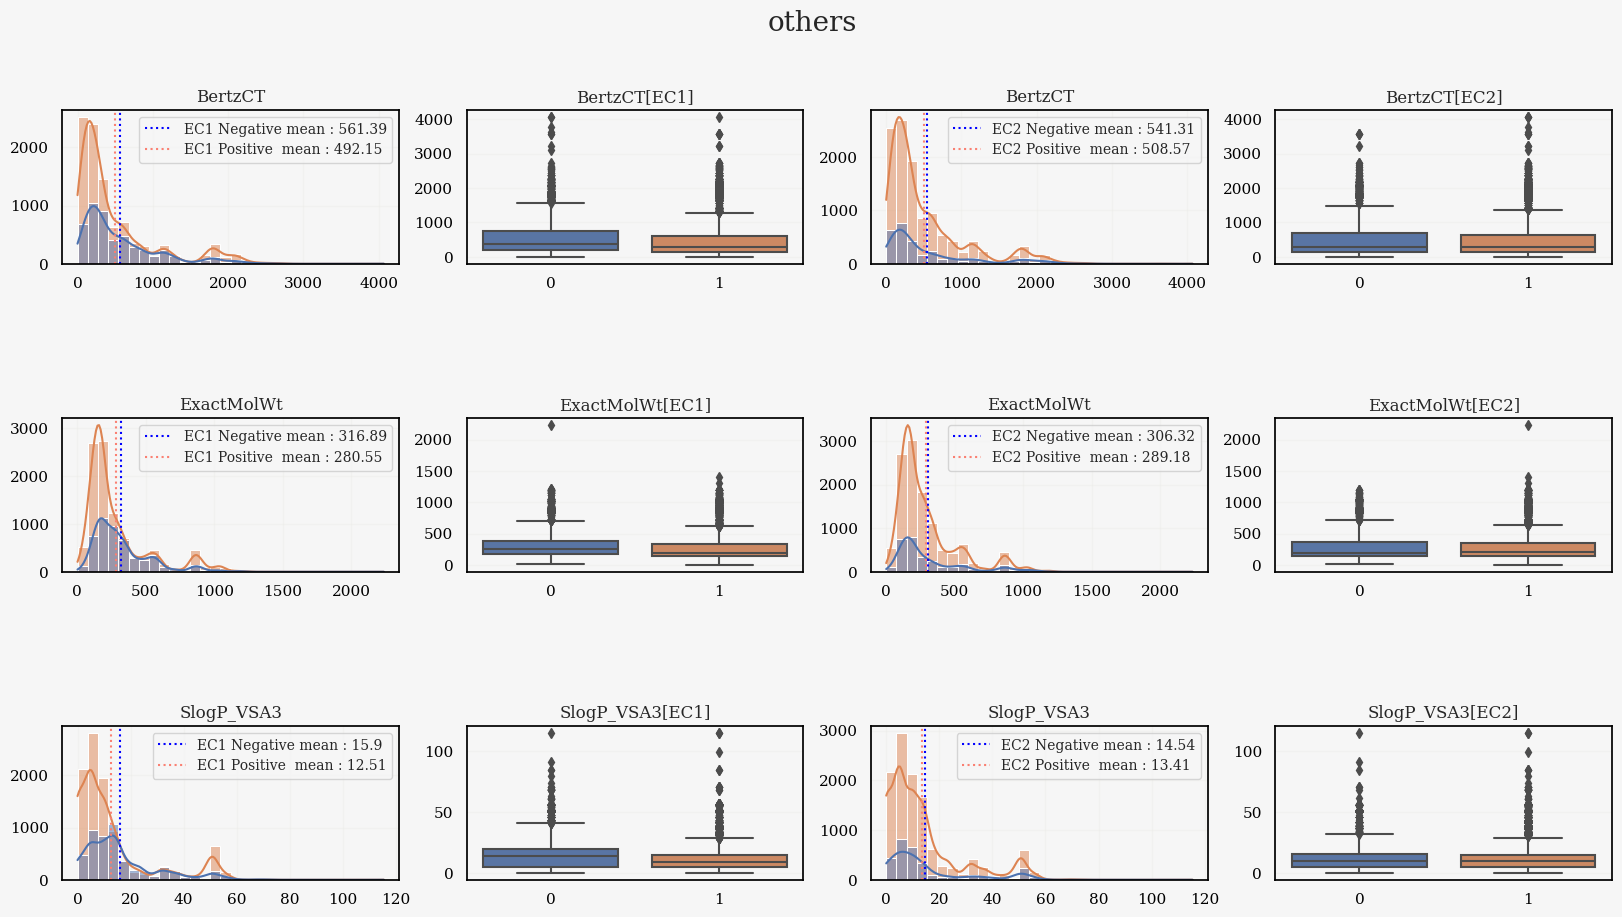

In [24]:
numeric_eda(df,factors[8],factor_names[8])

Text(0.5, 0.98, 'Composite Correlation Heatmap')

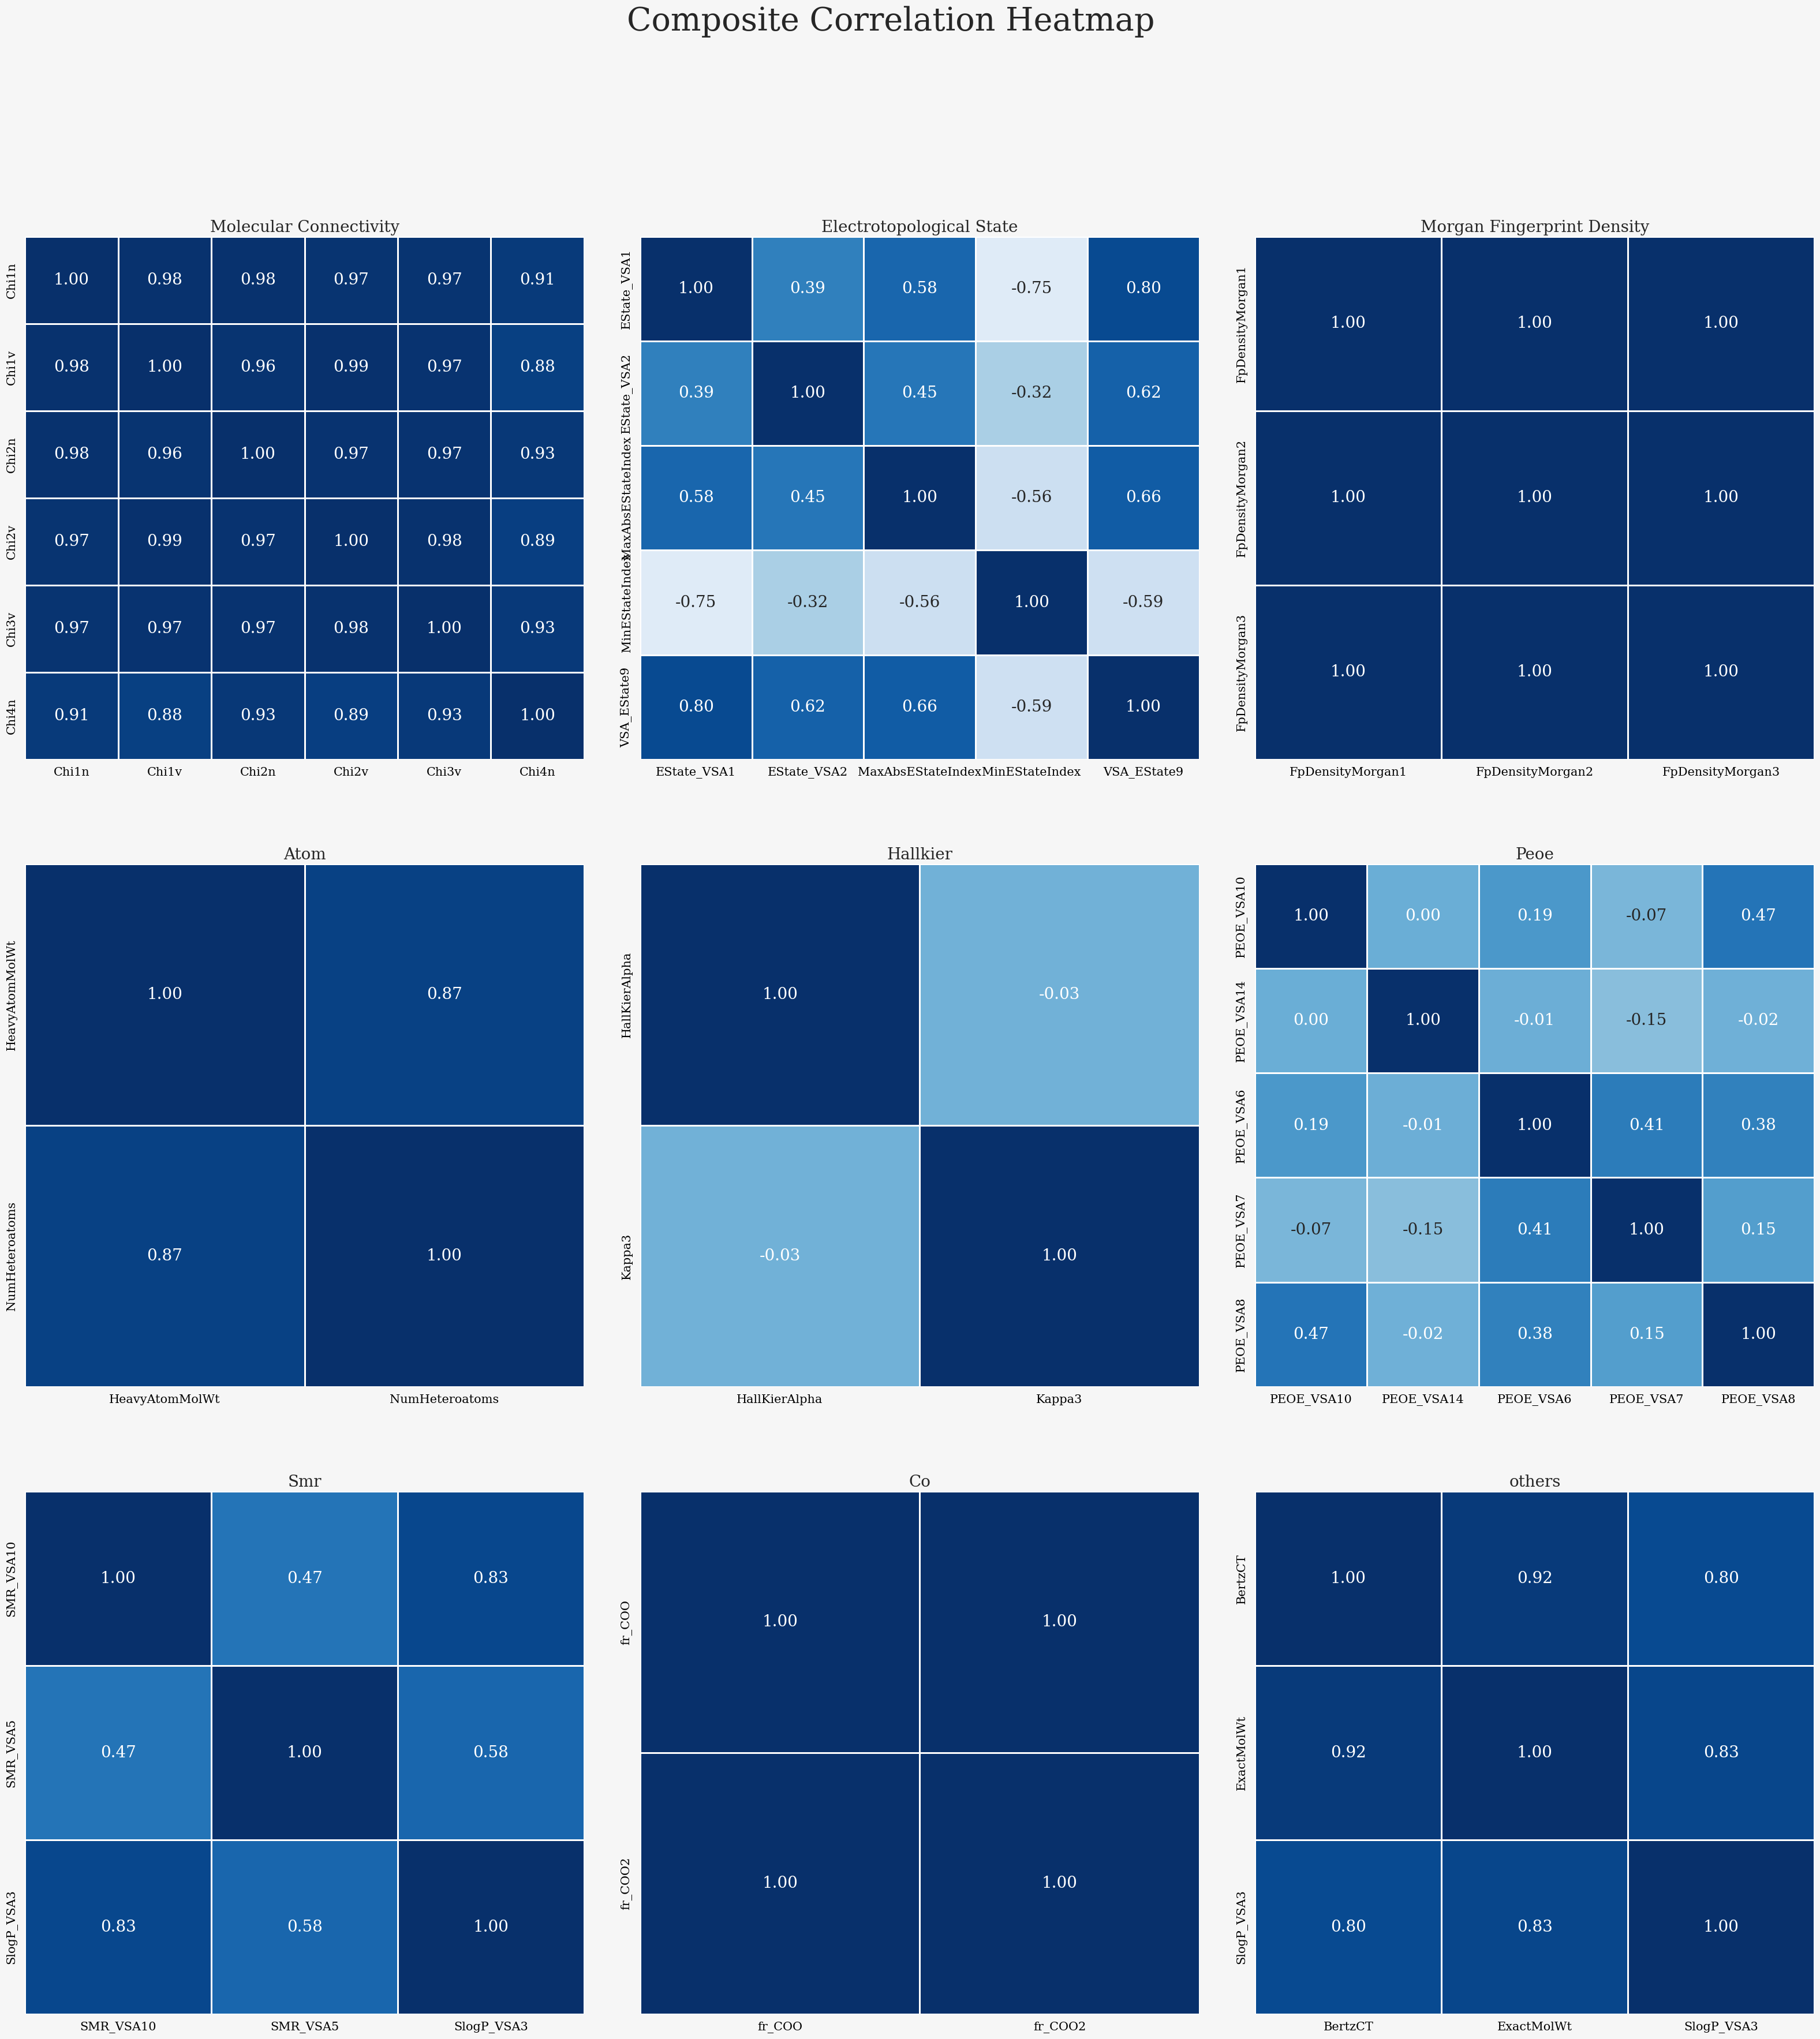

In [25]:
fig,ax = plt.subplots(ncols = 3, nrows = 3, figsize = (40,40))
ax = ax.flatten()
fig.subplots_adjust(wspace = 0.1)

for i,f in enumerate(factors):
    
    corr = df[f].corr()
    
    
    sns.heatmap(corr, ax = ax[i], cbar = False, vmin = -1, vmax = 1, cmap = 'Blues',
            linewidths = 1, annot = True, fmt = '.2f', annot_kws = {'fontsize': 20})  
    
    ax[i].set_title(factor_names[i], fontsize=20)
    ax[i].tick_params(axis = 'both', labelsize= 15)
fig.suptitle('Composite Correlation Heatmap', fontsize = 40)

Text(0.5, 0.98, 'Total Correlationship heatmap')

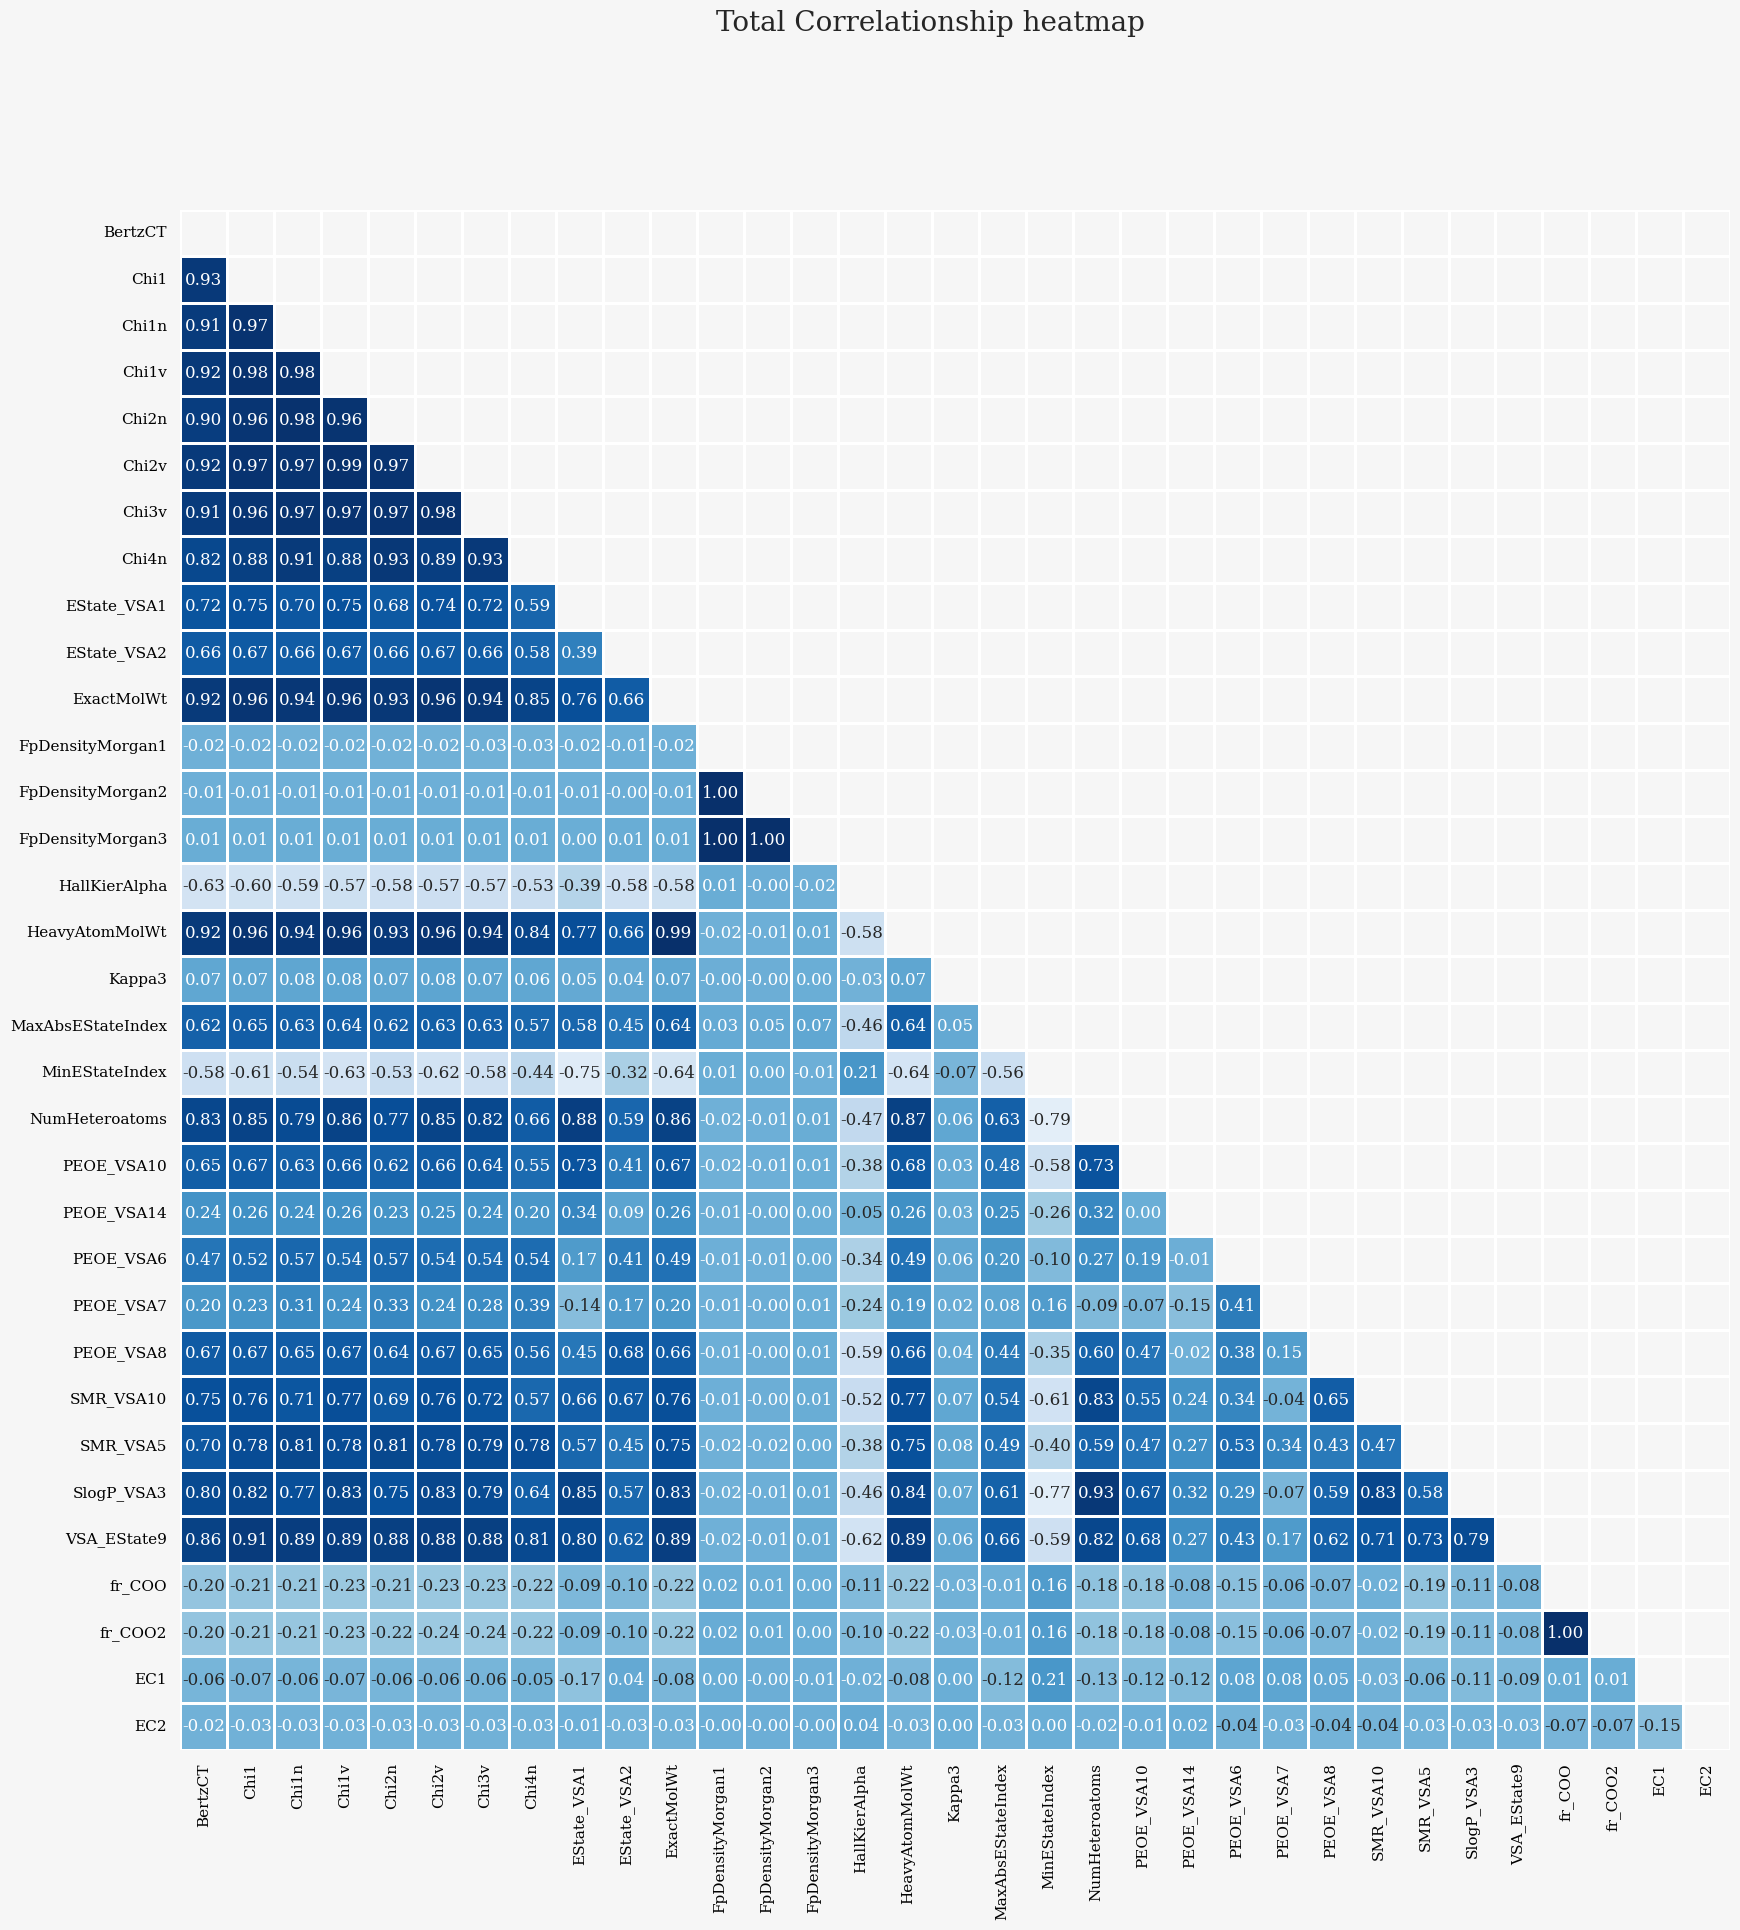

In [26]:
fig,ax = plt.subplots(figsize  = (20,20))

corr = df.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, ax = ax, cbar=False, vmin = -1, vmax = 1, cmap = 'Blues',
        linewidths = 1, annot = True, fmt = '.2f', mask = mask)

plt.suptitle('Total Correlationship heatmap', fontsize = 20)

Text(0.5, 1.1, 'PCA \n explained variance :0.99')

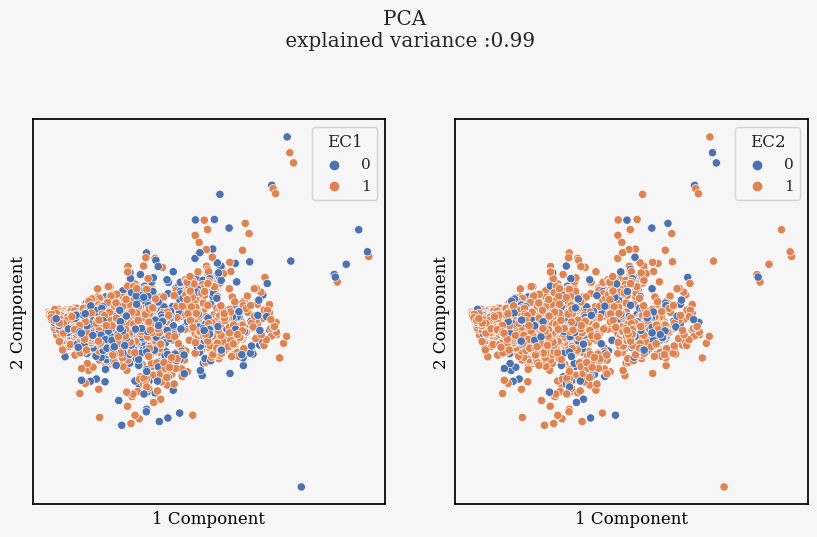

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca_df = pd.DataFrame(pca.fit_transform(df.drop(['EC1','EC2'],axis = 1)))

pca_df['EC1'] = df['EC1']
pca_df['EC2'] = df['EC2']

fig,ax = plt.subplots(ncols = 2, figsize = (10,5))

explained_variance = round(sum(pca.explained_variance_ratio_),2)

for i,col in enumerate(['EC1','EC2']):
    
    sns.scatterplot(data = pca_df,
                    x = 0, 
                    y = 1,
                    hue = col,
                    ax = ax[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('1 Component')
    ax[i].set_ylabel('2 Component')

fig.suptitle(f'PCA \n explained variance :{explained_variance}', y = 1.1)


    * PCA 를 통해 데이터 패턴을 바라봤을 때 구분하기 힘든 복잡한 구조를 가지고 있는 것 처럼 보인다

# **Modeling**

In [28]:
from lightgbm import  LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import roc_auc_score,auc,roc_curve

In [56]:
def grid_search(X,y,param_grid, cv):
    
    model = LGBMClassifier(verbose = -1)

    grid_model = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv, verbose = 1,
                                scoring =  'roc_auc')
    
    grid_model.fit(X,y)
    
    print('Best Score : ',round(grid_model.best_score_,3))
    
    return grid_model.best_estimator_

In [59]:
def oof_predict(model,X,y,test,n_split):
    
    
    cv =  KFold(n_splits = n_split, random_state = 42, shuffle = True)
    
    oof_preds =[]
    avg_score = 0
    
    for i,(train_idx,test_idx) in enumerate(cv.split(X,y)):
        
        train_x,train_y = X.iloc[train_idx],y.iloc[train_idx]
        valid_x,valid_y = X.iloc[test_idx], y.iloc[test_idx]
        
        model.fit(train_x,train_y)
        
        valid_proba = model.predict_proba(valid_x)[:,:1]
        valid_score = roc_auc_score(valid_y,valid_proba)
        
        avg_score += valid_score / n_split
        
        print(f'{blu}{i + 1} FOLD SET AUC : {red}{round(valid_score,2)}{res}')
        
        oof_preds.append(model.predict_proba(test)[:,:1])
        
    print('--' * 20)
    print(f'{n_split} FOLD AVG AUC : {round(avg_score,2)}')
    
    result = np.mean(oof_preds,axis = 0)
    
    return result    

In [65]:
%time

param_grid = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [5, 10, -1],
    'min_child_samples': [10, 20, 30],
}

X = df.drop(['EC1','EC2'],axis = 1)

preds = []

for i,target in enumerate(['EC1','EC2']):
    
    y = df[target]
    
    x_train,x_test,y_train,y_test = train_test_split(X,y, random_state = 42)
    
    best_model = grid_search(x_train,y_train,param_grid = param_grid,
                    cv = 5)
    
    oof_pred = oof_predict(best_model, x_train,y_train,x_test,n_split = 10)
    
    preds.append(oof_pred)

Wall time: 0 ns
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Score :  0.699
1 FOLD SET AUC : 0.32
2 FOLD SET AUC : 0.3
3 FOLD SET AUC : 0.29
4 FOLD SET AUC : 0.29
5 FOLD SET AUC : 0.31
6 FOLD SET AUC : 0.31
7 FOLD SET AUC : 0.29
8 FOLD SET AUC : 0.29
9 FOLD SET AUC : 0.31
10 FOLD SET AUC : 0.3
----------------------------------------
10 FOLD AVG AUC : 0.3
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Score :  0.572
1 FOLD SET AUC : 0.45
2 FOLD SET AUC : 0.45
3 FOLD SET AUC : 0.43
4 FOLD SET AUC : 0.44
5 FOLD SET AUC : 0.43
6 FOLD SET AUC : 0.44
7 FOLD SET AUC : 0.41
8 FOLD SET AUC : 0.42
9 FOLD SET AUC : 0.41
10 FOLD SET AUC : 0.42
----------------------------------------
10 FOLD AVG AUC : 0.43


# **OMG why my score is so bad :(((((((((((((((((((((((((((**

    * I'll try modeling properly later. 